In [83]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u

from analysis.electron_spectrum_analysis import energy_backpropagation, get_the_modulation_coefficient
from config.units import Gauss
from src.electron_cooling import JointCooling, SynchrotronCooling, InverseComptonCooling

from src.electron_spectrum_parametrization import SpectrumParametrization

In [84]:
cooling = JointCooling(magnetic_field=1e-6*Gauss)

time, energies = energy_backpropagation(cooling=cooling)

time scale = 1 yr
time_max = 125298 yr
min_energy 1e+10 eV, max_energy 1e+19 eV
True


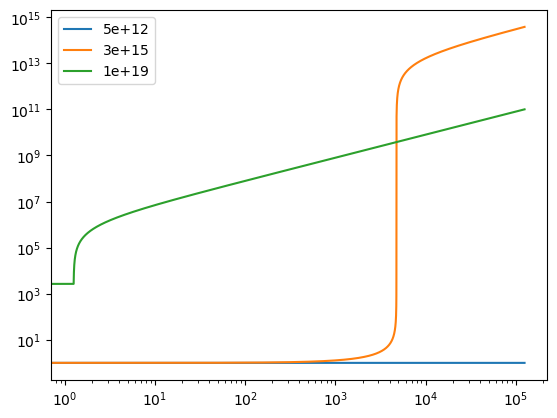

In [85]:
energies0 = energies[:, 0]
plt.loglog(time, energies[300] / energies[300], label=f"{energies0[300]:.0g}")
plt.loglog(time, energies[600] / energies0[600], label=f"{energies0[600]:.0g}")
plt.loglog(time, energies[999] / energies0[999], label=f"{energies0[999]:.0g}")
plt.legend()
plt.show()

In [86]:
modulation_coefficient = get_the_modulation_coefficient(cooling, time, energies)

In [89]:
from astropy.constants import codata2010 as cst
from config.units import Franklin
sin2_avg = 2 / 3
e = cst.e.gauss.value * Franklin
sharp_1Gauss = (2 * e**4 / (3 * cst.m_e**4 * cst.c**7) * (1e-6 * Gauss)**2 * sin2_avg).to(u.eV**(-1) * u.yr**(-1))

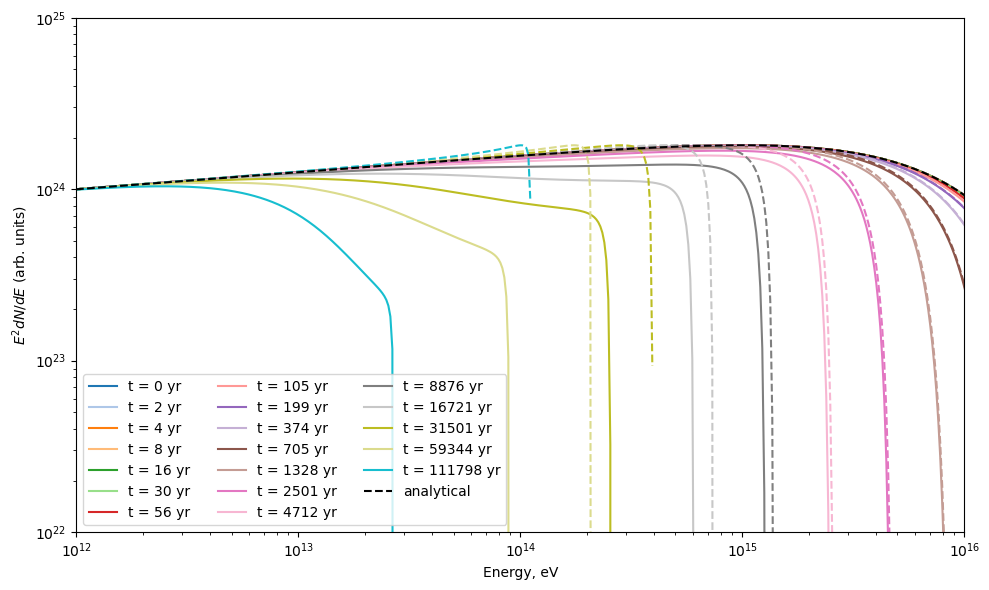

In [99]:
from config.plotting import Tab20

plt.figure(figsize=(10, 6))

spectrum = SpectrumParametrization(n0=1.0, e0=1e12 * u.eV, eta0=0.0, p0=1.9, k10=-3.0, k20=4.0)

counter = 0
for i, t_i in enumerate(time):
    if i % 550 == 0:
        # numerical solution
        plt.loglog(energies0, energies0**2 * spectrum.dn_de0(energies[:, i] * u.eV) * modulation_coefficient[:, i],
                   label=f't = {t_i:.0f} yr', color=Tab20[counter])
        sharp = sharp_1Gauss.value
        e_good = sharp * energies0 * t_i < 1
        e_mod = (energies0 / (1 - sharp * energies0 * t_i)) * u.eV
        analyt = spectrum.dn_de0(e_mod) / (1 - sharp * energies0 * t_i)**2
        plt.plot(energies0, energies0**2 * analyt * e_good, linestyle='dashed', color=Tab20[counter])
        counter += 1

plt.loglog(energies0, energies0**2 * spectrum.dn_de0(energies0 * u.eV), color='black', linestyle='dashed', label='analytical')

plt.xlim(1e12, 1e19)
plt.ylim(1e22, 1e25)
plt.xlim(1e12, 1e16)
plt.xlabel('Energy, eV')
plt.ylabel(r'$E^2 dN/dE$ (arb. units)')
plt.legend(ncol=3)

plt.tight_layout()
# plt.savefig('pictures/synchrotron_losses_evolution.png', dpi=600)
# plt.savefig('pictures/synchrotron_losses_evolution.pdf')
plt.show()